# Introduction

In this project, we’ll build a predictive model to predict if an applicant is able to repay the lending company or not
after getting a loan.

# Importing the libraries

In [93]:
# For Data manipulation
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# For Model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score,make_scorer

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Loading the data 

In [23]:
df_train = pd.read_csv("dataset_train.csv")
df_test = pd.read_csv("dataset_test.csv")

The dataset is from Analytics Vidhya <br>

Variable Description <br>
Loan_ID Unique Loan ID <br>
Gender Male/ Female <br>
Married Applicant married (Y/N) <br>
Dependents Number of dependents <br>
Education Applicant Education (Graduate/ Under Graduate) <br>
Self_Employed Self employed (Y/N) <br>
ApplicantIncome Applicant income <br>
CoapplicantIncome Coapplicant income <br>
LoanAmount Loan amount in thousands <br>
Loan_Amount_Term Term of loan in months <br>
Credit_History Credit history meets guidelines <br>
Property_Area Urban/ Semi Urban/ Rural <br>
Loan_Status Loan approved (Y/N) <br>

In [24]:
#display the first 5 rows of the Dataframe
df_test.shape

(367, 12)

Let’s make a copy of the train and test data so that even if we have to make any changes in these datasets we would not lose the original datasets.

In [25]:
df_train_original = df_train.copy()
df_test_original = df_test.copy()

Let's take a look at the data columns (features)

# Data Exploration

In [26]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [27]:
#get the shape of the Dataframe
df_train.shape

(614, 13)

We have 12 independant variables and one target variables (Loan_Status). Our goal is to predict the target Variable using some ML models.

In [28]:
#Getting the datatypes of the variables
df_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We have 8 categorical features, one intger and 4 float variables (5 numerical features).

In [29]:
#Let's take a look at the target variable
prop = df_train['Loan_Status'].value_counts(normalize=True)
print(prop)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64


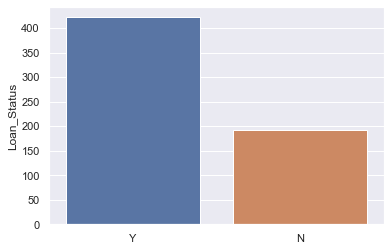

In [30]:
#Barplot of the target variable
sns.barplot(x=df_train.Loan_Status.value_counts().index, y=df_train.Loan_Status.value_counts())

The loan of 422(around 69%) people out of 614 were approved. <br>
Let's now take an insight into the independant variables. <br> 
We first distinguish three types of variables: <br>
    1- Categorical features: Gender, Married, Self_Employed, Credit_History, Loan_Status. <br>
    2- Ordinal features: Dependents, Education, Property_Area. <br>
    3- Numerical features: ApplicantIncome, Co-applicantIncome, LoanAmount, Loan_Amount_Term.

We begin with the categorical variables:

Text(0.5, 1.0, 'Credit_History')

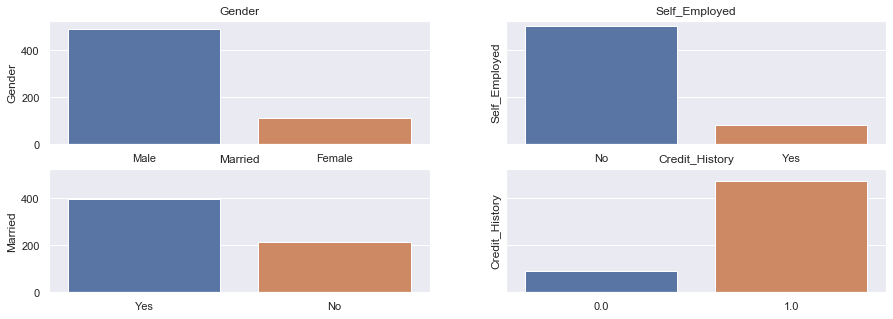

In [31]:
fig, axes = plt.subplots(2,2, figsize=(15, 5), sharey=True)

#Barplot of the gender variable
sns.barplot(ax=axes[0,0], x=df_train.Gender.value_counts().index, y=df_train.Gender.value_counts())
axes[0,0].set_title("Gender")

#Barplot of the Married variable
sns.barplot(ax=axes[1,0], x=df_train.Married.value_counts().index, y=df_train.Married.value_counts())
axes[1,0].set_title("Married")

#Barplot of the Self_Employed variable
sns.barplot(ax=axes[0,1], x=df_train.Self_Employed.value_counts().index, y=df_train.Self_Employed.value_counts())
axes[0,1].set_title("Self_Employed")

#Barplot of the Credit_History variable
sns.barplot(ax=axes[1,1], x=df_train.Credit_History.value_counts().index, y=df_train.Credit_History.value_counts())
axes[1,1].set_title("Credit_History")

Let's now take a look at the ordinal variables

Text(0.5, 1.0, 'Property_Area')

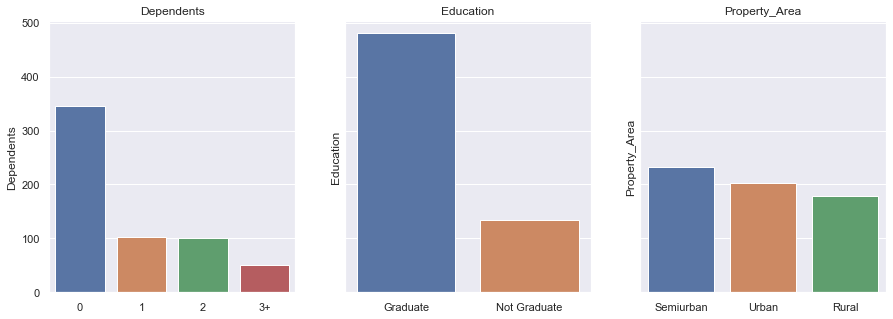

In [32]:
fig, axes = plt.subplots(1,3, figsize=(15, 5), sharey=True)

#Barplot of the Dependents variable
sns.barplot(ax=axes[0], x=df_train.Dependents.value_counts().index, y=df_train.Dependents.value_counts())
axes[0].set_title("Dependents")

#Barplot of the Education variable
sns.barplot(ax=axes[1], x=df_train.Education.value_counts().index, y=df_train.Education.value_counts())
axes[1].set_title("Education")

#Barplot of the Education variable
sns.barplot(ax=axes[2], x=df_train.Property_Area.value_counts().index, y=df_train.Property_Area.value_counts())
axes[2].set_title("Property_Area")

Let's now take a look at the numerical variables

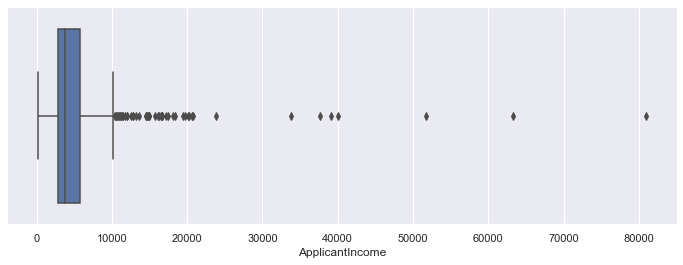

In [33]:
# Plot the histogram of the ApplicantIncome Variable
sns.set(rc={"figure.figsize": (12, 4)})
sns.boxplot(x = df_train["ApplicantIncome"])
plt.show()

We observe that we have two many outliers. That's obvious since we deal with people having 
different education levels. <br>
Let's split the boxplot respect to the education levels and check the differences among the two categories.

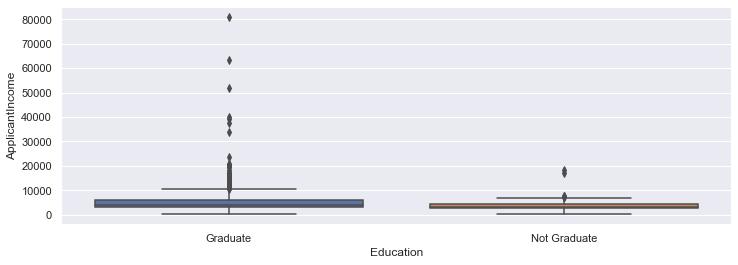

In [34]:
sns.set(rc={"figure.figsize": (12, 4)})
sns.boxplot(x = "Education", y= "ApplicantIncome", data = df_train)
plt.show()

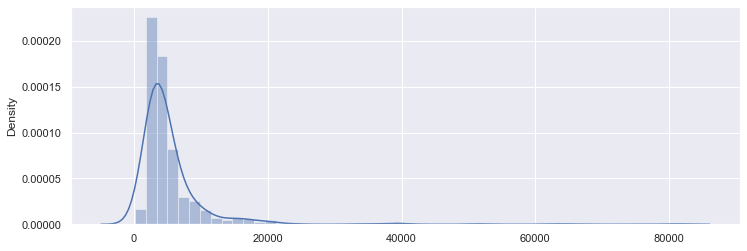

In [35]:
# Plot the distribution of the ApplicantIncome Variable
sns.set(rc={"figure.figsize": (12, 4)})
sns.distplot( x = df_train["ApplicantIncome"])
plt.show()

The data are not normally distributed. We will transform it later since many ML Algorithms work better
with normally distributed Variables.

Let’s look now at the Co-applicant income distribution.

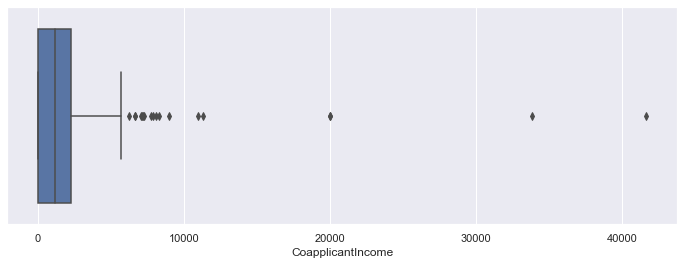

In [36]:
# Plot the histogram of the Co-applicant Variable
sns.set(rc={"figure.figsize": (12, 4)})
sns.boxplot(x = df_train["CoapplicantIncome"])
plt.show()

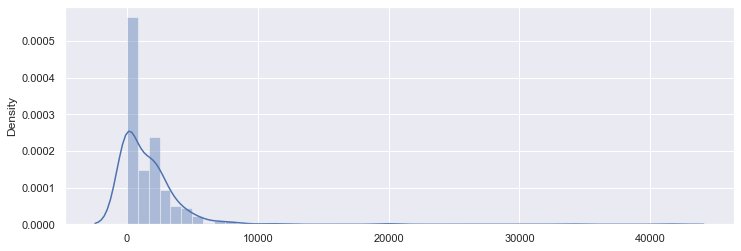

In [37]:
# Plot the distribution of the Co-applicant Variable
sns.set(rc={"figure.figsize": (12, 4)})
sns.distplot( x = df_train["CoapplicantIncome"])
plt.show()

We can observe that the co-applicant Income looks a little bit like the Applicant Variable. <br>
majority of co-applicants income ranges from 0 to 5000. We also see a lot of outliers in the applicant's income and it is not normally distributed.

Let’s look now at the LoanAmount distribution.

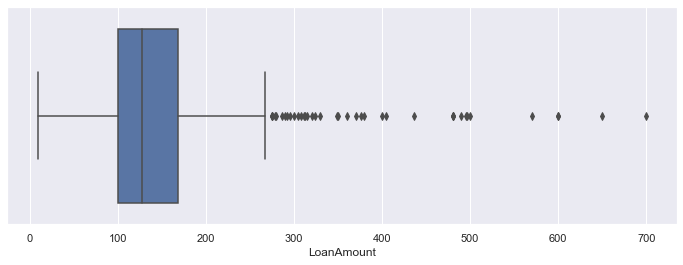

In [38]:
# Plot the histogram of the Loan Amount Variable
sns.set(rc={"figure.figsize": (12, 4)})
sns.boxplot(x = df_train["LoanAmount"])
plt.show()

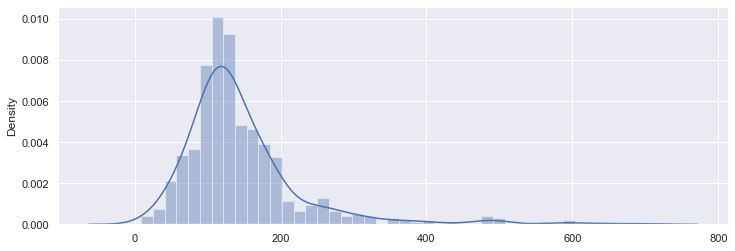

In [39]:
# Plot the distribution of the Loan Amount Variable
sns.set(rc={"figure.figsize": (12, 4)})
sns.distplot( x = df_train["LoanAmount"])
plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers later .

Lets' now investigate the relationship between the independant variables and target variable.

# Bivariate Analysis

## Categorical Independent Variable vs Target Variable

Let's begin with some barplots to get first insights

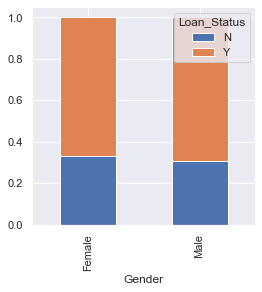

In [40]:
Gender=pd.crosstab(df_train["Gender"],df_train["Loan_Status"])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

We observe that the distribution of men and women is the same between approved and unapproved loans. <br>
Let's make some statistical Test to check if there is a relationship between Gender and Loan's status.

In [42]:
# Contingency Table
prob = 0.95
ct = pd.crosstab(df_train.Gender, df_train.Loan_Status, margins=True)

# Chi-square test
stat, p, dof, expected = chi2_contingency(ct)

#Test using thep-value
alpha = 1.0 - prob
if p <= alpha:
    print('The two variables are Dependent (reject H0)')
else:
    print('The two variables are Independent (fail to reject H0)')

The two variables are Independent (fail to reject H0)


We can conclude that Gender and Loan Status are independant. That seems logical since Men and Women nowadays 
live under the same financial situations. 

Let's investigate the relationships of the other variables (Married, Self_Employed, Credit_History, Dependents, Education and Property_Area ) with the target variable. We begin with the Married variable.

### Relationship Married vs LoanStatus

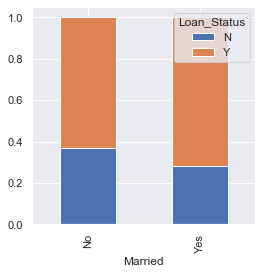

In [46]:
Married=pd.crosstab(df_train["Married"],df_train["Loan_Status"])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

In [44]:
# Married 
from scipy.stats import chi2_contingency
# Contingency Table
ct = pd.crosstab(df_train.Married, df_train.Loan_Status, margins=True)

# Chi-square test
stat, p, dof, expected = chi2_contingency(ct)

#Test using thep-value
alpha = 1.0 - prob
if p <= alpha:
    print('The two variables are Dependent (reject H0)')
else:
    print('The two variables are Independent (fail to reject H0)')

The two variables are Independent (fail to reject H0)


### Relationship Self_employed vs Loan_Status

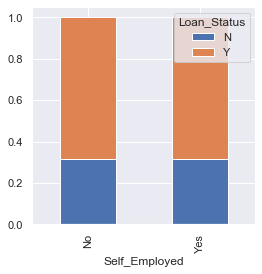

In [45]:
sel_emp = pd.crosstab(df_train["Self_Employed"],df_train["Loan_Status"])
sel_emp.div(sel_emp.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

In [47]:
#Self_Employed 
from scipy.stats import chi2_contingency
# Contingency Table
ct = pd.crosstab(df_train.Self_Employed, df_train.Loan_Status, margins=True)

# Chi-square test
stat, p, dof, expected = chi2_contingency(ct)

#Test using thep-value
alpha = 1.0 - prob
if p <= alpha:
    print('The two variables are Dependent (reject H0)')
else:
    print('The two variables are Independent (fail to reject H0)')

The two variables are Independent (fail to reject H0)


### Relationship Credit_History vs Loan_status

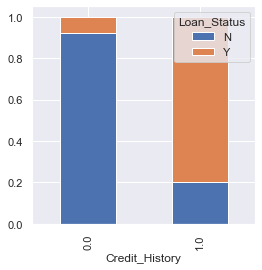

In [48]:
cred_hist = pd.crosstab(df_train["Credit_History"],df_train["Loan_Status"])
cred_hist.div(cred_hist.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

In [49]:
# Contingency Table
ct = pd.crosstab(df_train.Credit_History, df_train.Loan_Status, margins=True)

# Chi-square test
stat, p, dof, expected = chi2_contingency(ct)

#Test using thep-value
alpha = 1.0 - prob
if p <= alpha:
    print('The two variables are Dependent (reject H0)')
else:
    print('The two variables are Independent (fail to reject H0)')

The two variables are Dependent (reject H0)


### Relationship Dependents vs Loan_status

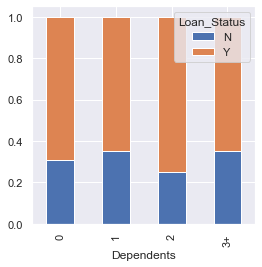

In [50]:
Dependents = pd.crosstab(df_train["Dependents"],df_train["Loan_Status"])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

In [51]:
# Contingency Table
ct = pd.crosstab(df_train.Dependents, df_train.Loan_Status, margins=True)

# Chi-square test
stat, p, dof, expected = chi2_contingency(ct)

#Test using thep-value
alpha = 1.0 - prob
if p <= alpha:
    print('The two variables are Dependent (reject H0)')
else:
    print('The two variables are Independent (fail to reject H0)')

The two variables are Independent (fail to reject H0)


### Relationship Education vs Loan_status

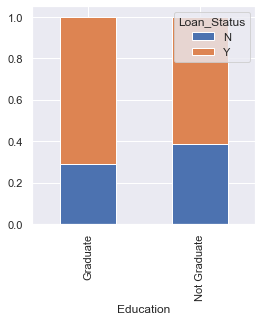

In [52]:
Education = pd.crosstab(df_train["Education"],df_train["Loan_Status"])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

In [53]:
# Contingency Table
ct = pd.crosstab(df_train.Education, df_train.Loan_Status, margins=True)

# Chi-square test
stat, p, dof, expected = chi2_contingency(ct)

#Test using thep-value
alpha = 1.0 - prob
if p <= alpha:
    print('The two variables are Dependent (reject H0)')
else:
    print('The two variables are Independent (fail to reject H0)')

The two variables are Independent (fail to reject H0)


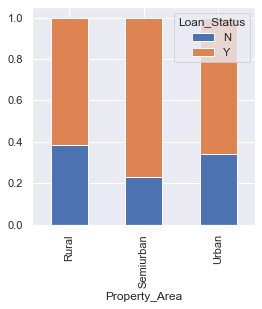

In [54]:
### Relationship Property_Area vs Loan_status
Property_Area = pd.crosstab(df_train["Property_Area"],df_train["Loan_Status"])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

In [55]:
# Contingency Table
ct = pd.crosstab(df_train.Property_Area, df_train.Loan_Status, margins=True)

# Chi-square test
stat, p, dof, expected = chi2_contingency(ct)

#Test using thep-value
alpha = 1.0 - prob
if p <= alpha:
    print('The two variables are Dependent (reject H0)')
else:
    print('The two variables are Independent (fail to reject H0)')

The two variables are Independent (fail to reject H0)


## Numerical Independent Variable vs Target Variable

In [ ]:
#To be done later

## Data Cleaning

In [56]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [57]:
# Data Imputation 
df_train["Gender"].fillna(df_train["Gender"].mode()[0], inplace=True)
df_train["Married"].fillna(df_train["Gender"].mode()[0], inplace=True)
df_train["Dependents"].fillna(df_train["Gender"].mode()[0], inplace=True)
df_train["Self_Employed"].fillna(df_train["Gender"].mode()[0], inplace=True)
df_train["Credit_History"].fillna(df_train["Gender"].mode()[0], inplace=True)
df_train["Loan_Amount_Term"].fillna(df_train["Loan_Amount_Term"].mode()[0], inplace=True)
df_train["LoanAmount"].fillna(df_train["LoanAmount"].median(), inplace=True)

In [58]:
# As we can see that all the missing values have been filled in the test dataset. Let’s fill all the missing values 
#in the test dataset too with the same approach.

df_test["Gender"].fillna(df_test["Gender"].mode()[0], inplace=True)
df_test["Married"].fillna(df_test["Gender"].mode()[0], inplace=True)
df_test["Dependents"].fillna(df_test["Gender"].mode()[0], inplace=True)
df_test["Self_Employed"].fillna(df_test["Gender"].mode()[0], inplace=True)
df_test["Credit_History"].fillna(df_test["Gender"].mode()[0], inplace=True)
df_test["Loan_Amount_Term"].fillna(df_test["Loan_Amount_Term"].mode()[0], inplace=True)
df_test["LoanAmount"].fillna(df_test["LoanAmount"].median(), inplace=True)


### Dealing with outliers

There are many ways to deal with outliers. We saw during our univariate Analysis that LoanAmount has too many outliers.
We will log transform the variable such that huge values of Loan Amounts doesn't affect the distribution of it.

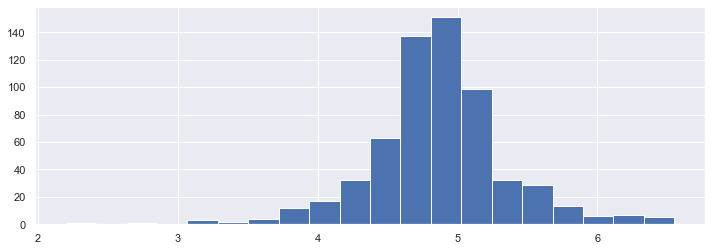

In [59]:
df_train["LoanAmount_log"]=np.log(df_train["LoanAmount"])
df_train["LoanAmount_log"].hist(bins=20)
df_test["LoanAmount_log"]=np.log(df_test["LoanAmount"])

In [60]:
df_train.drop(["LoanAmount"],axis = 1, inplace = True)
df_test.drop(["LoanAmount"],axis = 1, inplace = True)

The new Variable has a similar behaviour as the normal distribution

# Model Building

In [ ]:
df_train.columns

In [61]:
#We drop the columns that we won't need for our model building
df_train.drop(["Loan_ID"], axis = 1, inplace = True)

In [62]:
df_test.drop(["Loan_ID"], axis = 1, inplace = True)

In [63]:
# Define Inputs and Outputs
y = df_train["Loan_Status"]
X = df_train.drop(["Loan_Status"],axis = 1)

In [ ]:
type(df_train)

In [64]:
#OneHotEncoding
X = pd.get_dummies(X)
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

In [ ]:
df_test.columns


In [65]:
X.drop(["Married_Male"], axis=1, inplace = True)

In [66]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [67]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [68]:
pred_cv = model.predict(x_test)
accuracy_score(y_test,pred_cv)

0.7837837837837838

# Feature Engineering

Based on the domain knowledge, we can build new features that might affect the target variable. <br>
We will create the following three new features: <br>
    1- Total Income. <br>
    2- EMI (the monthly amount to be paid by the applicant to repay the loan.)
    3- Balance Income. 

In [69]:
df_train["Total_Income"] = df_train["ApplicantIncome"] + df_train["CoapplicantIncome"]
df_test["Total_Income"] = df_test["ApplicantIncome"] + df_test["CoapplicantIncome"]

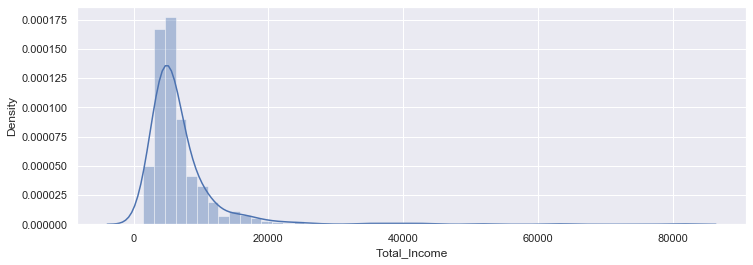

In [70]:
sns.distplot(df_train["Total_Income"])

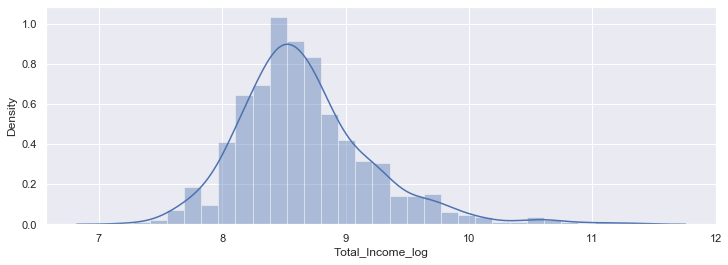

In [71]:
#Log-transformation
df_train["Total_Income_log"] = np.log(df_train["Total_Income"])
sns.distplot(df_train["Total_Income_log"])
df_test["Total_Income_log"] = np.log(df_test["Total_Income"])

In [72]:
#Drop Total Income
df_train.drop(["Total_Income"], axis = 1, inplace= True)
df_test.drop(["Total_Income"], axis = 1, inplace= True)

In [73]:
# EMI 
df_train["EMI"] = df_train["LoanAmount_log"]/df_train["Loan_Amount_Term"]
df_test["EMI"] = df_test["LoanAmount_log"]/df_test["Loan_Amount_Term"]

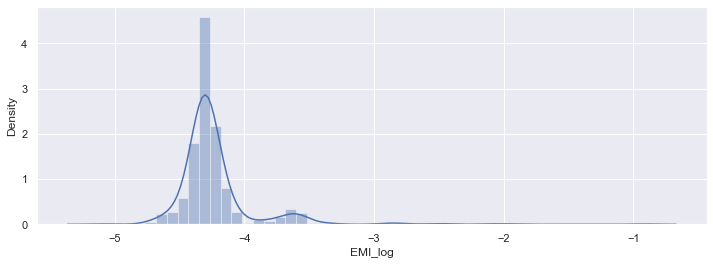

In [74]:
#Log-Transformation of EMI
df_train["EMI_log"] = np.log(df_train["EMI"])
sns.distplot(df_train["EMI_log"])
df_test["EMI_log"] = np.log(df_test["EMI"])

In [75]:
#Drop "EMI"
df_train.drop(["EMI"], axis = 1, inplace= True)
df_test.drop(["EMI"], axis = 1, inplace= True)

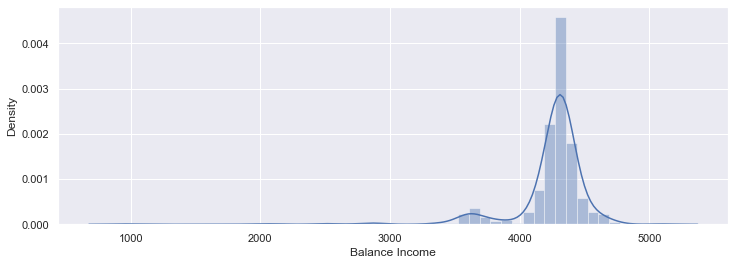

In [76]:
#Create Balance Variable
df_train["Balance Income"] = df_train["Total_Income_log"]-(df_train["EMI_log"]*1000)
df_test["Balance Income"] = df_test["Total_Income_log"]-(df_test["EMI_log"]*1000)
sns.distplot(df_train["Balance Income"])

In [77]:
#Drop original variables to avoid bias
df_train=df_train.drop(["ApplicantIncome", "CoapplicantIncome",  "Loan_Amount_Term"], axis=1)
df_test=df_test.drop(["ApplicantIncome", "CoapplicantIncome",  "Loan_Amount_Term"], axis=1)

# Model Building with the new features

After creating new features we will proceed with building new ML Model and compare them to the baseline one that we created earlier. we will start with the logistic regression model and then move over to more complex models like RandomForest and XGBoost.


In [81]:
df_train.drop(["Loan_Status_N","Loan_Status_Y"], axis = 1, inplace = True)

In [88]:
df_train.drop(["Married_Male"], axis = 1, inplace = True)

In [87]:
df_test.columns

Index(['LoanAmount_log', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Dependents_Male', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_Male', 'Self_Employed_No',
       'Self_Employed_Yes', 'Credit_History_0.0', 'Credit_History_1.0',
       'Credit_History_Male', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Total_Income_log', 'EMI_log', 'Balance Income'],
      dtype='object')

In [ ]:
## Logistic Regressi

In [94]:
Lr = LogisticRegression()
#Cross Validation
cross_val_score(model,df_train,y,cv=10, scoring=make_scorer(accuracy_score)).mean()

0.8030671602326811